## Reto 3: Describiendo histogramas

### 1. Objetivos:
    - Generar histogramas y caracterizarlos utilizando las herramientas que hemos aprendido hasta el momento

---
    
### 2. Desarrollo:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### a) Pima Indians Diabetes Database

Vamos a analizar un conjunto de datos que contiene datos acerca del estado de salud de mujeres menores de 21 años de ascendencia [pima](https://es.wikipedia.org/wiki/Pueblo_pima). El conjunto también tiene una columna 'outcome' que indica si las pacientes fueron diagnosticadas con diabetes o no. Puedes ver la descripción completa [aquí](https://www.kaggle.com/uciml/pima-indians-diabetes-database).  El dataset está guardado con el nombre de `diabetes-clean.csv`.

- Todas las variables independientes en este dataset son numéricas. Genera histogramas de todas las variables independientes para observar la distribución de estas variables. Un valor aceptable para el número de `bins` es `50`. Después de generar el histograma, caracterízalo con una descripción utilizando los términos que has aprendido en esta sesión.

- Intenta también discernir a simple vista la asimetría y curtosis de tus histogramas, y después confirma tus hipótesis utilizando las funciones `kurtosis` y `skew` del módulo `scipy.stats`.

- Ve si te es posible identificar la cantidad y magnitud de los valores atípicos usando histogramas. ¿Cuál ha sido la técnica que te ha facilitado más la identificación de valores atípicos? ¿Boxplots, tablas de frecuencias o histogramas?

Comenta con la experta y con tus compañeros por qué crees que esas variables tengan la distribución que tienen.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
from google.colab import userdata

In [ ]:
ruta = userdata.get('ruta')

df = pd.read_csv(ruta + "diabetes-clean.csv", index_col = 0)
df.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df_diabetes = df.drop(columns=['outcome'])
df_diabetes.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [ ]:
def crear_grafico(df, column):
    # Calcular asimetría y curtosis
    skewness = skew(df[column].dropna())
    kurt = kurtosis(df[column].dropna())
    print(f"Asimetría (Skewness): {skewness}")
    print(f"Curtosis: {kurt}")

    # Calcular valores atípicos usando IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Definir los límites para valores atípicos
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Generar el histograma con líneas de valores atípicos
    sns.set(style='white')
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=False, bins=50)
    plt.axvline(limite_inferior, color='red', linestyle='--', label='Límite inferior (outlier)')
    plt.axvline(limite_superior, color='red', linestyle='--', label='Límite superior (outlier)')
    # Títulos y etiquetas
    plt.title(f'Histograma de {column}', fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Frecuencia', fontsize=14)
    plt.grid(True)
    # Mostrar el gráfico
    plt.show()

Asimetría (Skewness): 0.8999119408414357
Curtosis: 0.15038273760948462


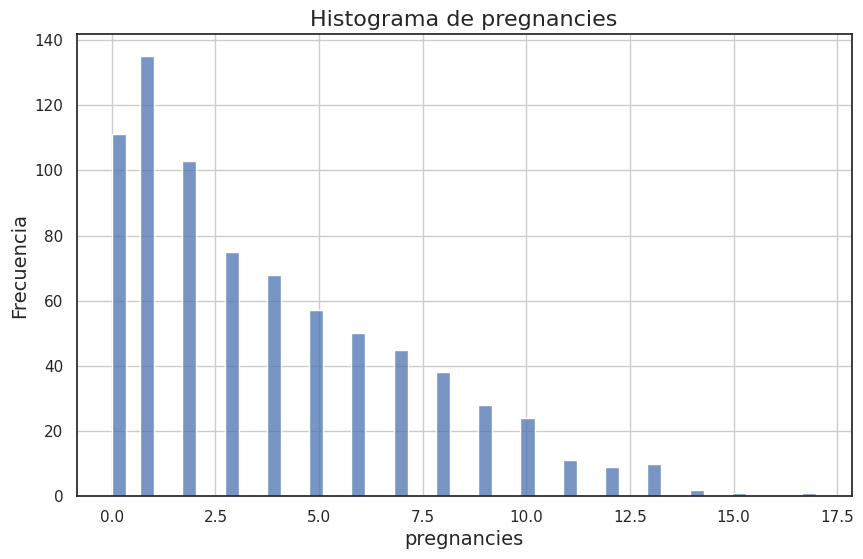



Asimetría (Skewness): 0.17341395519987735
Curtosis: 0.6288133337300685


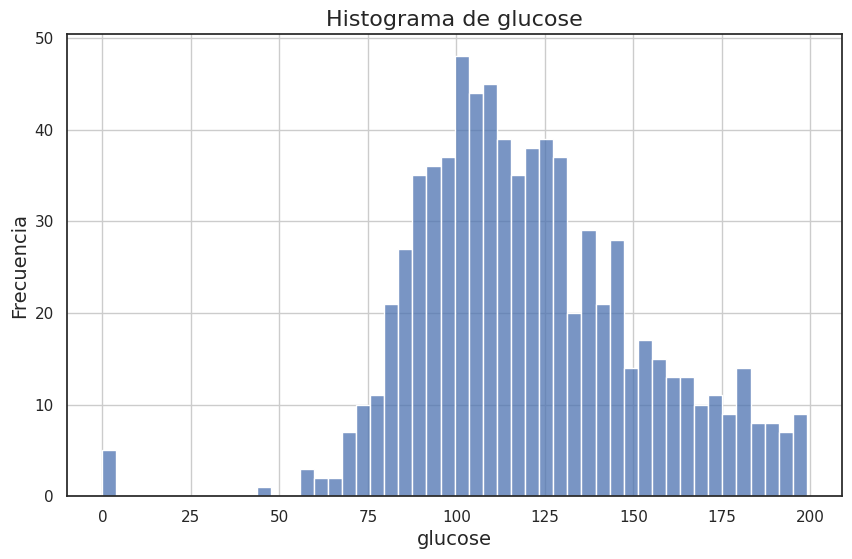



Asimetría (Skewness): -1.8400052311728738
Curtosis: 5.138690662525438


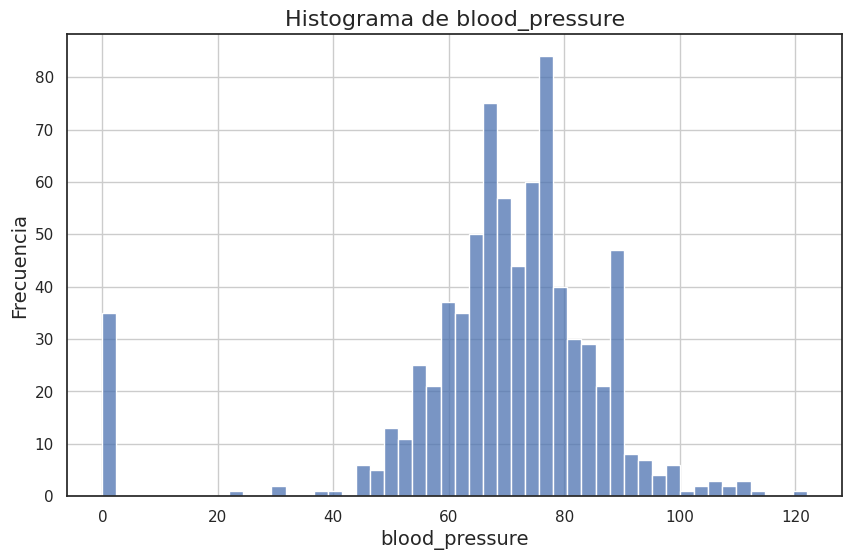



Asimetría (Skewness): 0.109158762323673
Curtosis: -0.5244944887652805


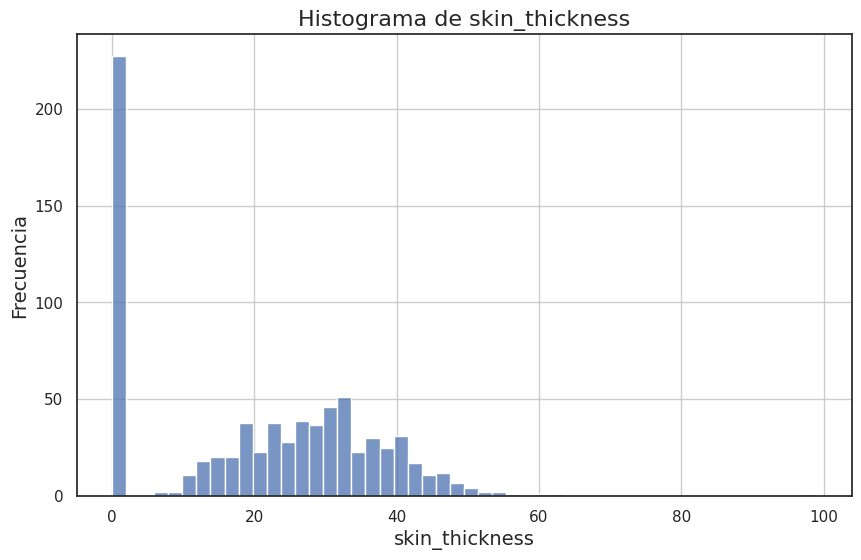



Asimetría (Skewness): 2.2678104585131753
Curtosis: 7.159574916971424


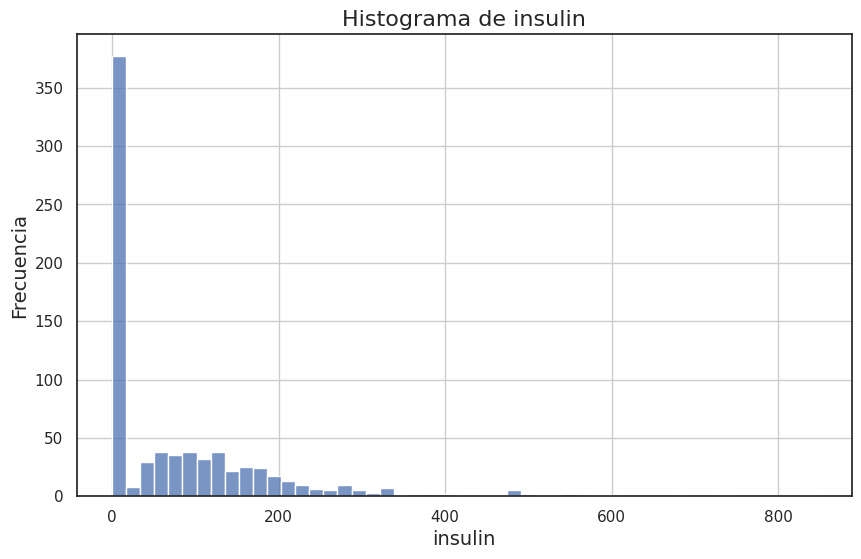



Asimetría (Skewness): -0.42814327880861786
Curtosis: 3.2612574203612645


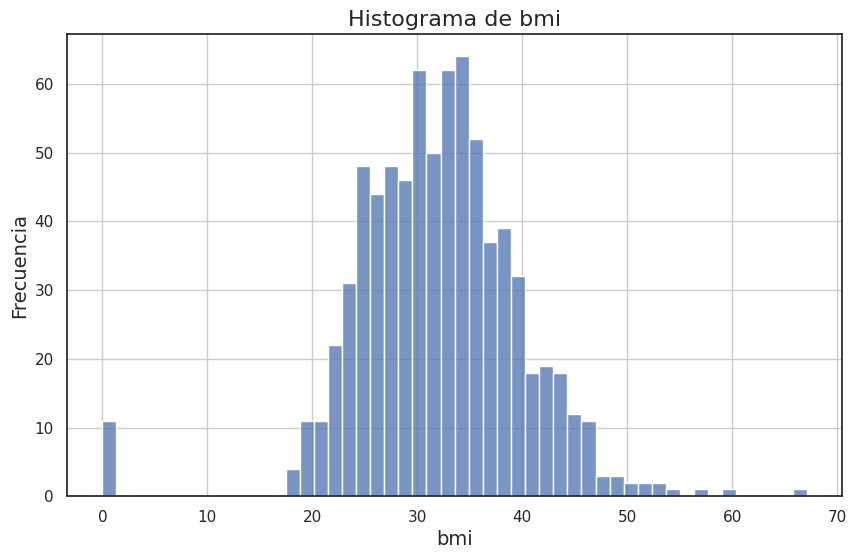



Asimetría (Skewness): 1.9161592037386292
Curtosis: 5.550792047551205


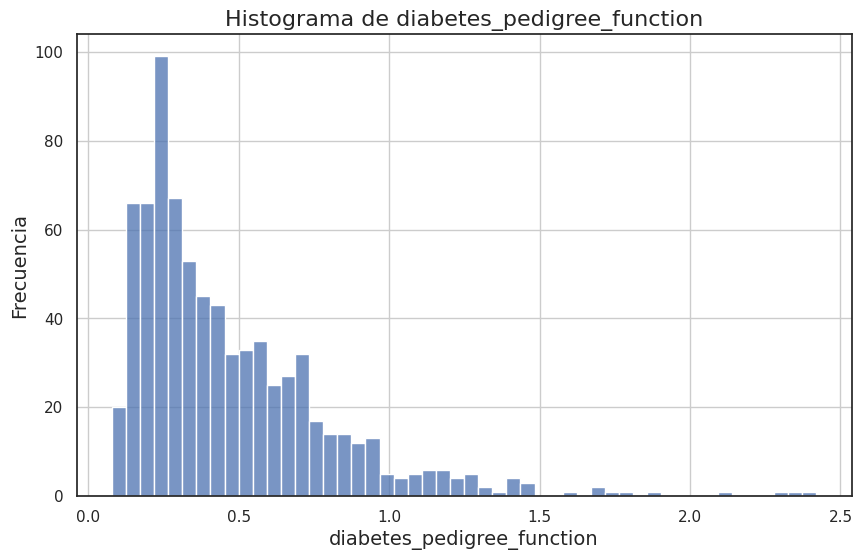



Asimetría (Skewness): 1.127389259531697
Curtosis: 0.6311769413798585


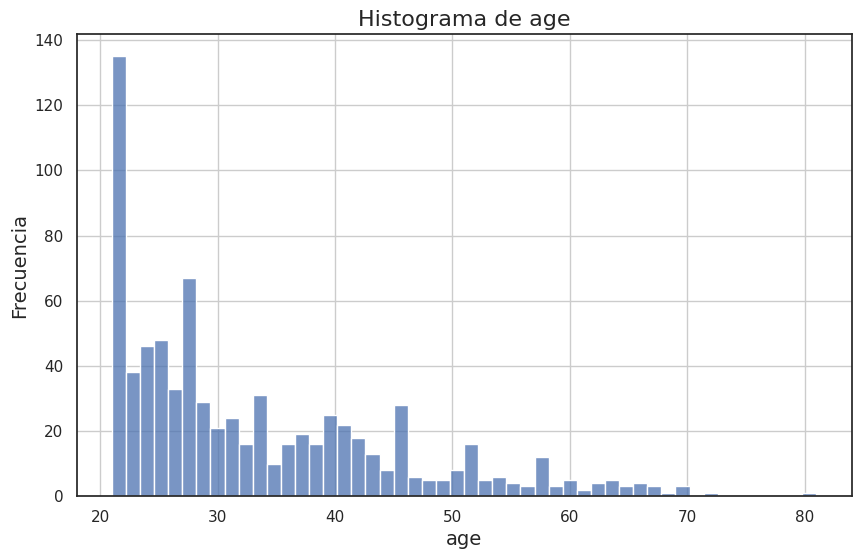

In [ ]:
variables_independientes = df_diabetes.columns

for variable in variables_independientes:
  crear_grafico(df_diabetes, variable)
  print("\n")